### Situación de Covid-19 en Trenque Lauquen al 30 de Julio de 2021

El siguiente código muestra una estadística básica utilizando los datos extraídos del sistema covid de la municipacilidad de Trenque Lauquen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
covid = pd.read_csv('casostl.csv',dtype={'Vacuna':str, 'FechaAplicacion':str})

In [3]:
covid.columns

Index(['id', 'Estado', 'Localidad', 'Genero', 'Edad', 'FechaDenuncia',
       'FechaAlta', 'TieneTest', 'FechaPedidoTest', 'FechaResultadoTest',
       'ResultadoTest', 'Sintomas', 'Comorbilidades', 'Vacuna', 'Dosis',
       'FechaAplicacion', 'ContactosEstrechos', 'Convivientes'],
      dtype='object')

In [4]:
covid['FechaPedidoTest'] = pd.to_datetime(covid['FechaPedidoTest'],errors='ignore', format= "%Y/%m/%d")
covid['FechaResultadoTest'] = pd.to_datetime(covid['FechaResultadoTest'],errors='ignore', format= "%Y/%m/%d")
covid['FechaDenuncia'] = pd.to_datetime(covid['FechaDenuncia'],errors='coerce', format= "%Y/%m/%d")
covid['FechaAlta'] = pd.to_datetime(covid['FechaAlta'],errors='ignore', format= "%Y/%m/%d")
covid['FechaAplicacion'] = pd.to_datetime(covid['FechaAlta'],errors='ignore', format= "%d/%m/%Y")
covid['Semana'] = covid['FechaDenuncia'].dt.isocalendar().year*100+covid['FechaDenuncia'].dt.isocalendar().week

In [82]:
confirmados = covid[(covid['Estado'] == 'Confirmado') | (covid['Estado'] == 'Defuncion') |\
                    (covid['Estado'] == 'Derivado') | (covid['Estado'] == 'Recuperado')]
fallecidos = covid[covid['Estado'] == 'Defuncion']

In [104]:
covid.shape

(39299, 19)

In [94]:
print('Prevalentes {:d}'.format(len(confirmados['id'].unique())))
print('Confirmados más de una vez {:d}'.format(confirmados['id'].count()-len(confirmados['id'].unique())))
print('Fallecidos {:d}'.format(fallecidos['id'].count()))

Prevalentes 9656
Confirmados más de una vez 96
Fallecidos 164


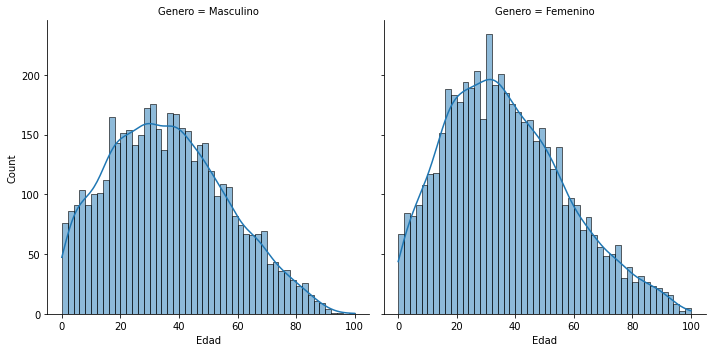

In [6]:
sns.displot(data=confirmados, x='Edad',bins=50,kde=True,col='Genero', stat='count')

In [7]:
confirmados['Genero'].value_counts()

Femenino     5254
Masculino    4498
Name: Genero, dtype: int64

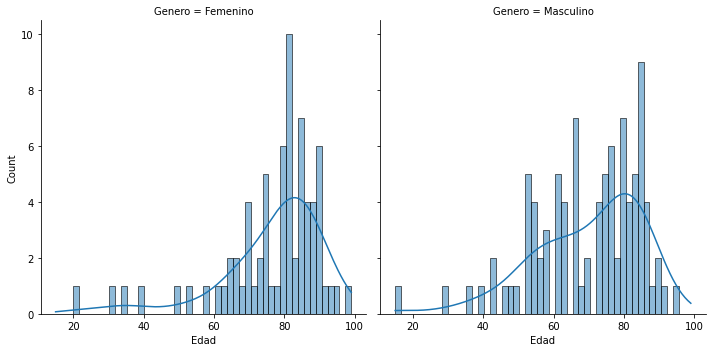

In [144]:
sns.displot(data=fallecidos, x='Edad',bins=50,kde=True,col='Genero', stat='count')

In [145]:
fallecidos['Genero'].value_counts()

Masculino    93
Femenino     71
Name: Genero, dtype: int64

In [146]:
93/(93+71)

0.5670731707317073

In [8]:
incidencia = confirmados.groupby('FechaDenuncia').size()
incidenciaW = confirmados.groupby('Semana').size()

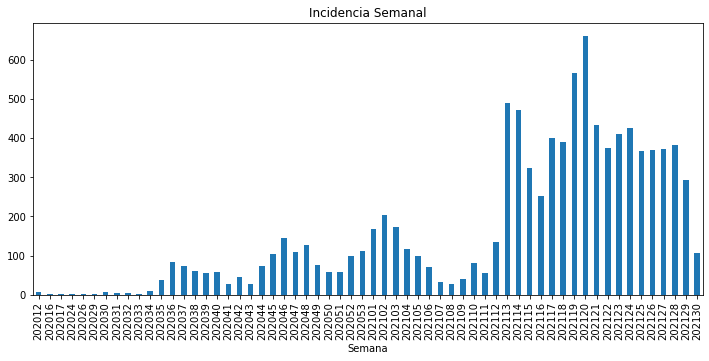

In [95]:
plt.figure(figsize=(12,5))
incidenciaW.plot(kind='bar', title='Incidencia Semanal')
#plt.bar(incidencia.index,incidencia)

Text(0.5, 1.0, 'Confirmados en 2021')

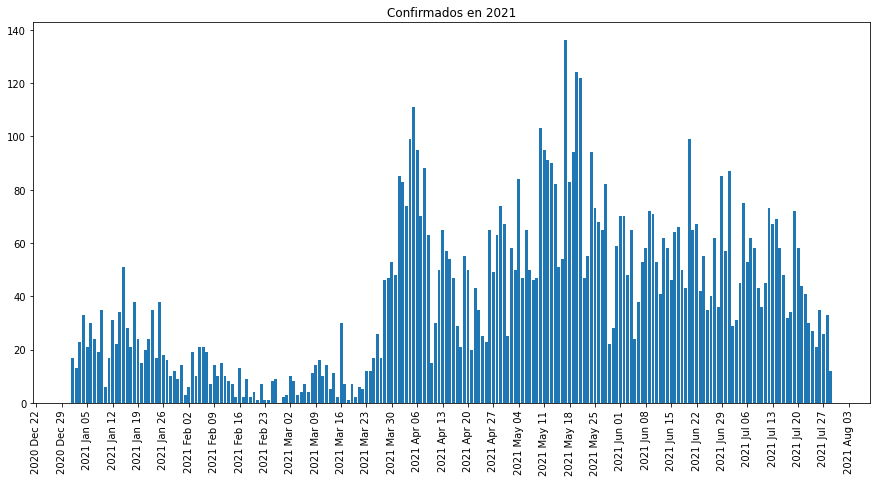

In [250]:
inc2021 = incidencia[incidencia.index >= pd.Timestamp(2021,1,1)]
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(inc2021.index, inc2021.values)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b %d'))
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Confirmados en 2021')

In [131]:
tests = covid.groupby('FechaPedidoTest').size()
tests2021 = tests[tests.index >= pd.Timestamp(2021,1,1)]

Text(0.5, 1.0, 'Test realizados')

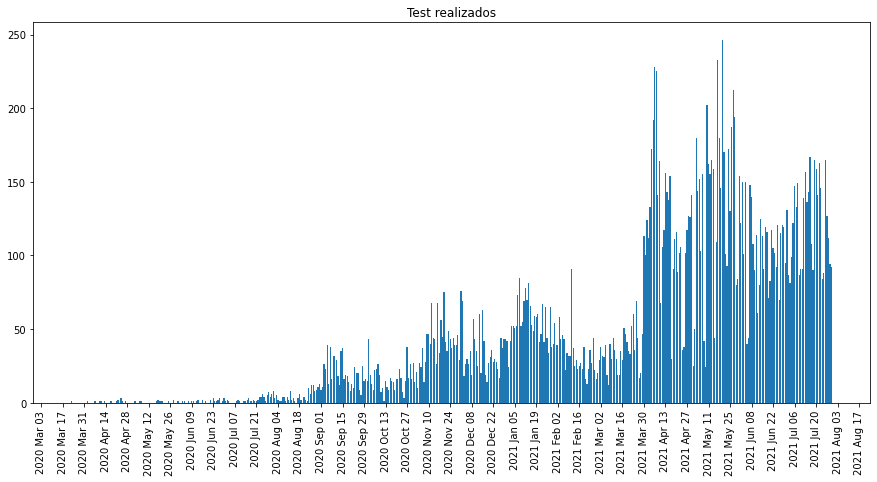

In [249]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(tests.index, tests.values)
#ax.grid(axis='y')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b %d'))
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Test realizados')

Text(0.5, 1.0, 'Test realizados durante 2021')

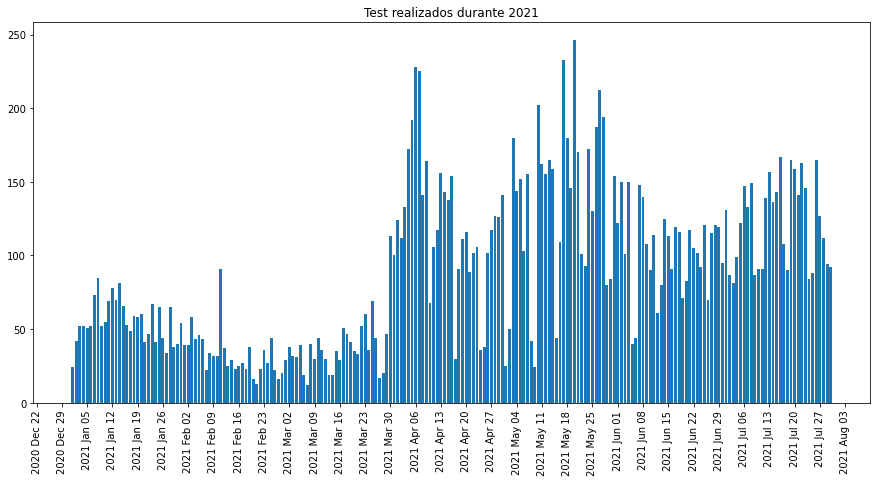

In [248]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(tests2021.index, tests2021.values)
#ax.grid(axis='y')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b %d'))
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Test realizados durante 2021')

In [159]:
tests.sum()

22326

#### Test / Casos
Mide el % de test respecto de la cantidad de casos diarios

In [192]:
covid['TieneTest'] = np.where(covid['TieneTest'] == 'Si',1,0)

Text(0.5, 1.0, 'Test realizados/Casos totales')

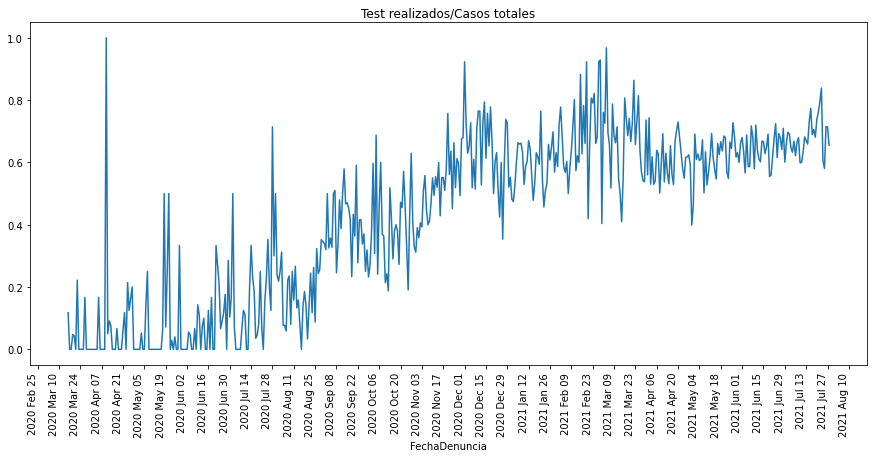

In [247]:
test_rel = covid[['FechaDenuncia','TieneTest']].groupby('FechaDenuncia').agg({'TieneTest':['count','sum']})
tr = test_rel[('TieneTest', 'sum')]/test_rel[('TieneTest', 'count')]
fig, ax = plt.subplots(figsize=(15,7))
tr[20:-2].plot(ax=ax) # tomo los datos luego de algunas fechas erróneas y saco tests pendientes
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b %d'))
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Test realizados/Casos totales')

#### Positividad
Test + / total de test

In [238]:
covid.columns

Index(['id', 'Estado', 'Localidad', 'Genero', 'Edad', 'FechaDenuncia',
       'FechaAlta', 'TieneTest', 'FechaPedidoTest', 'FechaResultadoTest',
       'ResultadoTest', 'Sintomas', 'Comorbilidades', 'Vacuna', 'Dosis',
       'FechaAplicacion', 'ContactosEstrechos', 'Convivientes', 'Semana',
       'Positividad'],
      dtype='object')

In [232]:
covid['Positividad'] = np.where(covid['ResultadoTest'] == 'POSITIVO',1,0)

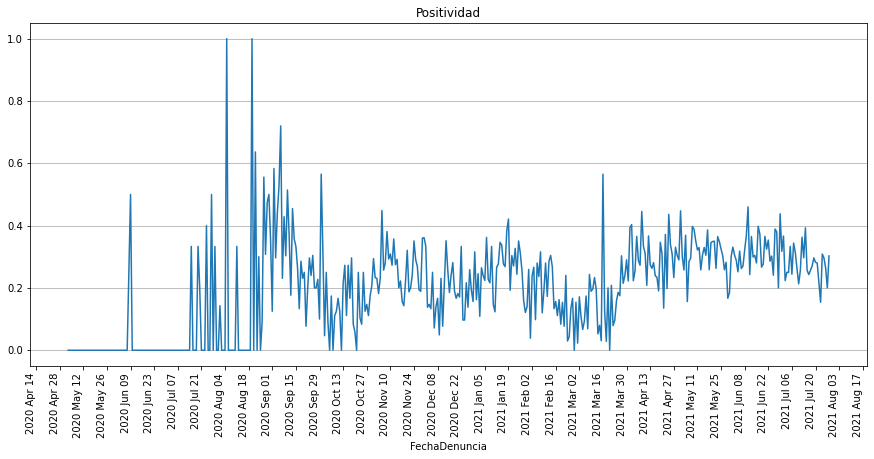

In [245]:
con_test = covid[covid['TieneTest'] == 1]
test_rel = con_test[['FechaDenuncia','Positividad']].groupby('FechaDenuncia').agg({'Positividad':['count','sum']})
tr = test_rel[('Positividad', 'sum')]/test_rel[('Positividad', 'count')]
fig, ax = plt.subplots(figsize=(15,7))
tr[20:-2].plot(ax=ax) # tomo los datos luego de algunas fechas erróneas y saco los test pendientes (últimos 2 dias)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b %d'))
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Positividad')
ax.grid(axis='y')

In [244]:
tr[-:]

FechaDenuncia
2021-07-26    0.263636
2021-07-27    0.200000
2021-07-28    0.302632
2021-07-29    0.150000
2021-07-30    0.000000
dtype: float64